### [그룹화 처리에 대해서 그래프 그리기]
- 주제 : 생존자 중 성별 비율 시각화

In [1]:
# [1] 모듈 로딩
import pandas as pd
import df_util as util
import matplotlib.pyplot as plt

In [2]:
# [2] 데이터 준비
# [3] CSV => DataFrame로 저장
file_path='titanic.csv'
titanDF = pd.read_csv(file_path)

In [3]:
# [4] 데이터 확인
util.checkDataFrame(titanDF, titanDF)


[     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  a

In [4]:
# [5] 분석 주제 ==> 성별에 따른 나이 분포
# - 분석 컬럼 즉, 성별과 나이 컬럼
# - loc[행, 열]
gender_aliveDF=titanDF[['sex','survived']] # dataDF.loc[:,['sex','age']]

In [5]:
# [5-1] 데이터 전처리 : 결측치, 결측값
# - 결측치 : isna(), isnull()

gender_aliveDF.isna().sum()

sex         0
survived    0
dtype: int64

In [6]:
# -- 결측치 처리 ==> 성별에 따라 치환
# -- 성별에 따른 그룹화
groupObj=gender_aliveDF.groupby('sex')

In [7]:
groupObj.value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

- 생존자 중 성별 비율 시각화

In [8]:
new_genderDF=groupObj.agg(['count'])

In [9]:
new_genderDF

,survived
,count
sex,
female,314
male,577


In [10]:
new_genderDF.index

Index(['female', 'male'], dtype='object', name='sex')

In [11]:
new_genderDF.columns

MultiIndex([('survived', 'count')],
           )

<BarContainer object of 2 artists>

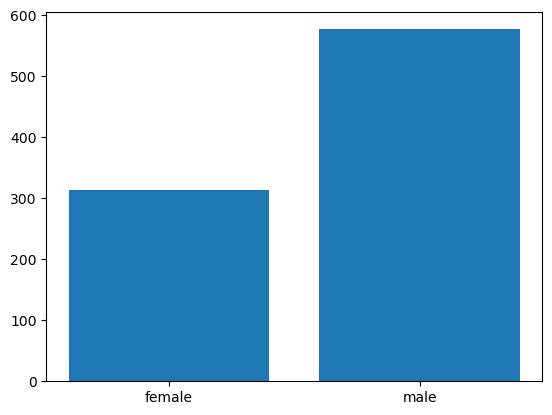

In [12]:
plt.bar(new_genderDF.index, new_genderDF[('survived', 'count')])

- 생존자 나이별 성별 비율 비교 시각화

In [13]:
# [5] 분석 주제 ==> 생존자의 나이별 성별 비율을 분석
# - 분석 컬럼 즉, 나이와 성별 컬럼
# - loc[행, 열]
titanDF[titanDF['survived'] == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [14]:
survivedDF=titanDF[titanDF['survived'] == 1]
survived_age_genderDF=survivedDF.loc[:,['age','sex']]

In [15]:
survived_age_genderDF

,age,sex
1,38.0,female
2,26.0,female
3,35.0,female
8,27.0,female
9,14.0,female
...,...,...
875,15.0,female
879,56.0,female
880,25.0,female
887,19.0,female


In [16]:
util.checkDataFrame(survived_age_genderDF, survived_age_genderDF)


[      age     sex
1    38.0  female
2    26.0  female
3    35.0  female
8    27.0  female
9    14.0  female
..    ...     ...
875  15.0  female
879  56.0  female
880  25.0  female
887  19.0  female
889  26.0    male

[342 rows x 2 columns]]
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 1 to 889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     290 non-null    float64
 1   sex     342 non-null    object 
dtypes: float64(1), object(1)
memory usage: 8.0+ KB
index: Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
       ...
       865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
      dtype='int64', length=342)
columns: Index(['age', 'sex'], dtype='object')
ndim: 2
shape: (342, 2)


In [17]:
mean_age=survived_age_genderDF['age'].mean()

In [18]:
survived_age_genderDF['age'].fillna(mean_age, inplace=True)

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_13384\2474783014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survived_age_genderDF['age'].fillna(mean_age, inplace=True)


In [19]:
# [5-1] 데이터 전처리 : 결측치, 결측값
# - 결측치 : isna(), isnull()
survived_age_genderDF.isna().sum()

age    0
sex    0
dtype: int64

In [20]:
# 각 나이를 카테고리화
category_ages=pd.cut(survived_age_genderDF['age'], bins=10)
category_ages

1       (32.252, 40.21]
2      (24.294, 32.252]
3       (32.252, 40.21]
8      (24.294, 32.252]
9       (8.378, 16.336]
             ...       
875     (8.378, 16.336]
879    (48.168, 56.126]
880    (24.294, 32.252]
887    (16.336, 24.294]
889    (24.294, 32.252]
Name: age, Length: 342, dtype: category
Categories (10, interval[float64, right]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] < (24.294, 32.252] ... (48.168, 56.126] < (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

In [21]:
survived_age_genderDF.shape

(342, 2)

In [22]:
category_ages.shape

(342,)

In [23]:
category_ageDF=pd.concat([survived_age_genderDF, category_ages], axis=1).copy()
category_ageDF

,age,sex,age
1,38.0,female,"(32.252, 40.21]"
2,26.0,female,"(24.294, 32.252]"
3,35.0,female,"(32.252, 40.21]"
8,27.0,female,"(24.294, 32.252]"
9,14.0,female,"(8.378, 16.336]"
...,...,...,...
875,15.0,female,"(8.378, 16.336]"
879,56.0,female,"(48.168, 56.126]"
880,25.0,female,"(24.294, 32.252]"
887,19.0,female,"(16.336, 24.294]"


In [26]:
category_ageDF=category_ageDF.set_index(['sex'])

<BarContainer object of 342 artists>

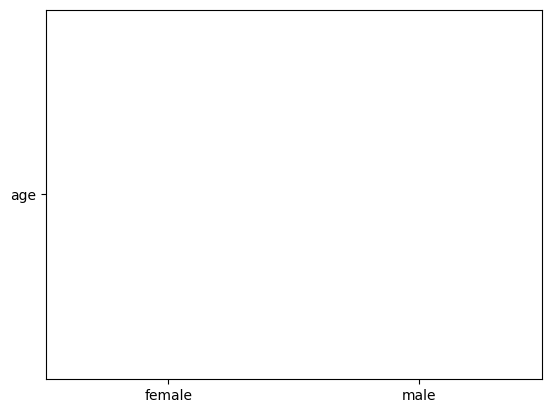

In [27]:
plt.bar(category_ageDF.index, category_ageDF.columns[-1])